In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json

import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [ ]:
!pip install tensorflow-addons

In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255 

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 128
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 2048
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005

In [5]:
x_train, x_unlab, y_train, y_unlab = train_test_split( train_images, train_labels , test_size=0.5, random_state=42 )
X_train, X_test, Y_train, Y_test = train_test_split( x_train,y_train , test_size=0.2, random_state=40 )

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.02),
        layers.experimental.preprocessing.RandomWidth(0.2),
        layers.experimental.preprocessing.RandomHeight(0.2),
    ]
)

# Setting the state of the normalization layer.
data_augmentation.layers[0].adapt(x_train)

In [40]:
num_classes = 10
input_shape = (32, 32, 3)

def create_encoder():
    resnet = keras.applications.ResNet50V2(
        include_top=False, weights=None, input_shape=input_shape, pooling="avg"
    )

    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    outputs = resnet(augmented)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-encoder")
    return model


encoder = create_encoder()
encoder.summary()

Model: "cifar10-encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 32, 32, 3)         7         
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
Total params: 23,564,807
Trainable params: 23,519,360
Non-trainable params: 45,447
_________________________________________________________________


In [42]:
def create_classifier(encoder, trainable=True):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [47]:
learning_rate = 0.001
batch_size = 128
hidden_units = 512
projection_units = 128
num_epochs = 2
dropout_rate = 0.5
temperature = 0.05

In [48]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)


def add_projection_head(encoder):
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="cifar-encoder_with_projection-head"
    )
    return model


In [ ]:
encoder = create_encoder()

encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedContrastiveLoss(temperature),
)

encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit(
    x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs
)

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 cifar10-encoder (Functional  (None, 2048)             23564807  
 )                                                               
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
Total params: 23,827,079
Trainable params: 23,781,632
Non-trainable params: 45,447
_________________________________________________________________
Epoch 1/2
391/391 [==============================] - 2087s 5s/step - loss: 4.5781
Epoch 2/2
343/391 [=========================>....] - ETA: 4:45 - loss: 4.3695

In [ ]:
classifier = create_classifier(encoder, trainable=False) 

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs) 

accuracy = classifier.evaluate(x_test, y_test)[1] 
print(f"Test accuracy: {round(accuracy * 100, 2)}%") 

In [5]:
num_classes = 10
input_shape = (32, 32, 3)


def create_encoder():
    resnet = keras.applications.MobileNetV3Small(
        include_top=False, weights=None, input_shape=input_shape, pooling="avg"
    )

    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    outputs = resnet(augmented)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-encoder")
    return model


encoder = create_encoder()
encoder.summary()

learning_rate = 0.001
batch_size = 64
hidden_units = 512
projection_units = 64
num_epochs = 20
dropout_rate = 0.5
temperature = 0.05

Model: "cifar10-encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         7         
                                                                 
 MobilenetV3small (Functiona  (None, 576)              939120    
 l)                                                              
                                                                 
Total params: 939,127
Trainable params: 927,008
Non-trainable params: 12,119
_________________________________________________________________


In [6]:
def create_classifier(encoder, trainable=True):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [7]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)


def add_projection_head(encoder):
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="cifar-encoder_with_projection-head"
    )
    return model

In [8]:
encoder = create_encoder()

encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedContrastiveLoss(temperature),
)

encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit(
    x=X_train, y=Y_train, batch_size=batch_size, epochs=num_epochs
)

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 cifar10-encoder (Functional  (None, 576)              939127    
 )                                                               
                                                                 
 dense (Dense)               (None, 64)                36928     
                                                                 
Total params: 976,055
Trainable params: 963,936
Non-trainable params: 12,119
_________________________________________________________________
Epoch 1/20


InvalidArgumentError: Graph execution error:

logits and labels must be broadcastable: logits_size=[64,64] labels_size=[640,64]
	 [[{{node softmax_cross_entropy_with_logits_1}}]] [Op:__inference_train_function_20122]

In [21]:
np.shape(Y_train)

(20000, 10)

In [9]:
len(X_test)

5000

In [7]:
arr = np.concatenate((X_train, x_unlab))
X_all = arr
arr = np.concatenate((Y_train, y_unlab))
Y_all = arr

In [8]:
len(Y_all)

45000

In [10]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [21]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(32))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(10, activation="softmax"))

    model.summary()
    return model

In [30]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = tf.keras.applications.MobileNetV3Small(
    input_shape=(32,32,3),
    alpha=1.0,
    minimalistic=True,
    include_top=True,
    weights=None,
    input_tensor=None,
    classes=10,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

    model.summary()
    return model

In [11]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = tf.keras.applications.EfficientNetB0(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None,
    classes=10,
    classifier_activation="softmax"
)

    model.summary()
    return model

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_2 (Rescaling)        (None, 32, 32, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 32, 32, 3)   7           ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization_2[0]

 block2b_expand_bn (BatchNormal  (None, 8, 8, 144)   576         ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 8, 8, 144)   576         ['block2b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 2, 2, 112)    53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 2, 2, 672)    75264       ['block5c_add[0][0]']            
                                                                                                  
 block6a_e

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  28800       ['block6c_expand_activation[0][0]
 D)       

                                                                                                  
 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_a

563/563 [==============================] - 214s 380ms/step - loss: 2.0365 - accuracy: 0.3428 - val_loss: 1.7284 - val_accuracy: 0.3724
Epoch 14/200
563/563 [==============================] - ETA: 0s - loss: 1.9797 - accuracy: 0.3726
Epoch 14: val_loss did not improve from 1.72839
563/563 [==============================] - 203s 361ms/step - loss: 1.9797 - accuracy: 0.3726 - val_loss: 2.1182 - val_accuracy: 0.2548
Epoch 15/200
563/563 [==============================] - ETA: 0s - loss: 2.1348 - accuracy: 0.2983
Epoch 15: val_loss did not improve from 1.72839
563/563 [==============================] - 213s 378ms/step - loss: 2.1348 - accuracy: 0.2983 - val_loss: 2.0929 - val_accuracy: 0.3307
Epoch 16/200
563/563 [==============================] - ETA: 0s - loss: 1.9345 - accuracy: 0.3600
Epoch 16: val_loss did not improve from 1.72839
563/563 [==============================] - 224s 397ms/step - loss: 1.9345 - accuracy: 0.3600 - val_loss: 5.4196 - val_accuracy: 0.2663
Epoch 17/200
563/563 [

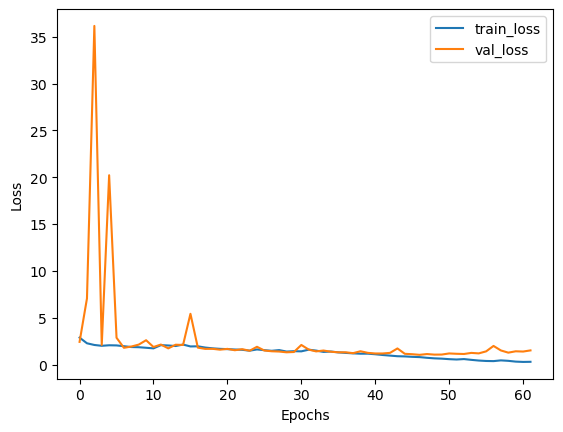

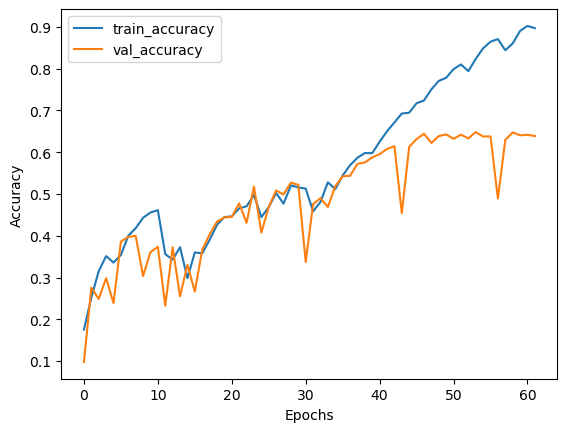

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.4511500597000122, 'accuracy': 0.656000018119812}
----------------------------------------------------------------------------------------------------


In [14]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=200,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ),early_stopping ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_all, X_test, Y_all, Y_test)

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 32, 32, 3)    0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 32, 32, 3)   7           ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization_1[0]

 block2b_expand_bn (BatchNormal  (None, 8, 8, 144)   576         ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 8, 8, 144)   576         ['block2b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 2, 2, 112)    53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 2, 2, 672)    75264       ['block5c_add[0][0]']            
                                                                                                  
 block6a_e

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  28800       ['block6c_expand_activation[0][0]
 D)       

                                                                                                  
 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_a

125/125 [==============================] - 41s 332ms/step - loss: 1.8837 - accuracy: 0.3775 - val_loss: 1.7995 - val_accuracy: 0.3495
Epoch 14/40
125/125 [==============================] - ETA: 0s - loss: 1.8626 - accuracy: 0.3845
Epoch 14: val_loss did not improve from 1.79951
125/125 [==============================] - 41s 325ms/step - loss: 1.8626 - accuracy: 0.3845 - val_loss: 12.5071 - val_accuracy: 0.1395
Epoch 15/40
125/125 [==============================] - ETA: 0s - loss: 2.1491 - accuracy: 0.3299
Epoch 15: val_loss did not improve from 1.79951
125/125 [==============================] - 41s 326ms/step - loss: 2.1491 - accuracy: 0.3299 - val_loss: 2.0141 - val_accuracy: 0.2835
Epoch 16/40
125/125 [==============================] - ETA: 0s - loss: 2.1097 - accuracy: 0.3512
Epoch 16: val_loss did not improve from 1.79951
125/125 [==============================] - 41s 327ms/step - loss: 2.1097 - accuracy: 0.3512 - val_loss: 2.0064 - val_accuracy: 0.3590
Epoch 17/40
125/125 [=======

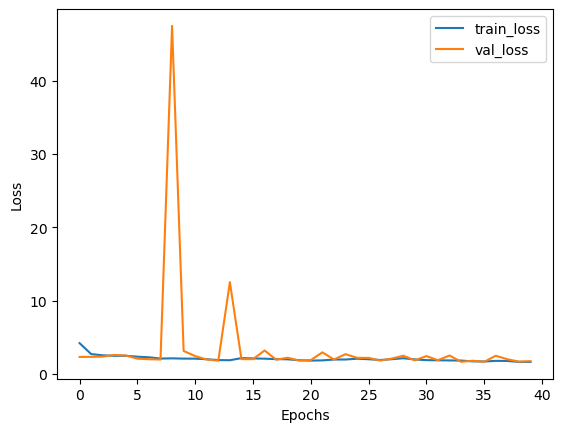

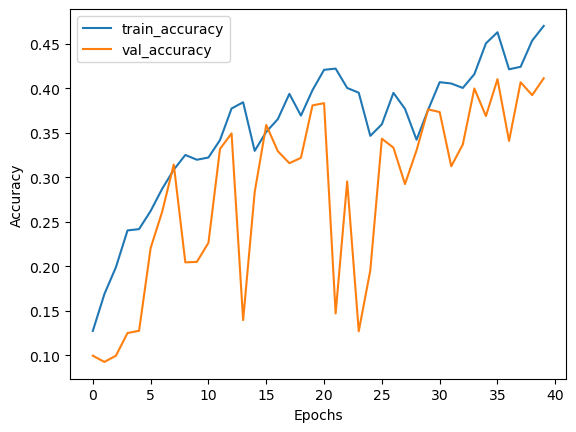

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.7818206548690796, 'accuracy': 0.4180999994277954}
----------------------------------------------------------------------------------------------------


In [14]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=40,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ) ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_train, X_test, Y_train, Y_test)

In [15]:
def train(model,X_train, Y_train):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    checkpoint = keras.callbacks.ModelCheckpoint(
        "AL_Model.h5", save_best_only=True, verbose=1
    )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(X_train, Y_train, batch_size = 64, epochs=40,validation_split=.20)
    
    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )

    return model

In [16]:
def test(model, X_test, Y_test):
    print("-" * 100)
    print("Test set evaluation: ", model.evaluate( X_test, Y_test , verbose=0, return_dict=True), )
    print("-" * 100)

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_3 (Rescaling)        (None, 32, 32, 3)    0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 32, 32, 3)   7           ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization_3[0]

 block2b_expand_bn (BatchNormal  (None, 8, 8, 144)   576         ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 8, 8, 144)   576         ['block2b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 2, 2, 112)    53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 2, 2, 672)    75264       ['block5c_add[0][0]']            
                                                                                                  
 block6a_e

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  28800       ['block6c_expand_activation[0][0]
 D)       

                                                                                                  
 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_a

Epoch 26/40
250/250 [==============================] - 86s 344ms/step - loss: 2.0120 - accuracy: 0.3699 - val_loss: 1.8005 - val_accuracy: 0.3422
Epoch 27/40
250/250 [==============================] - 89s 357ms/step - loss: 2.0483 - accuracy: 0.3365 - val_loss: 1.9949 - val_accuracy: 0.2665
Epoch 28/40
250/250 [==============================] - 91s 364ms/step - loss: 2.0241 - accuracy: 0.3381 - val_loss: 2.8487 - val_accuracy: 0.3280
Epoch 29/40
250/250 [==============================] - 86s 345ms/step - loss: 1.9489 - accuracy: 0.3661 - val_loss: 1.8024 - val_accuracy: 0.3565
Epoch 30/40
250/250 [==============================] - 89s 357ms/step - loss: 1.8542 - accuracy: 0.3857 - val_loss: 2.2267 - val_accuracy: 0.3277
Epoch 31/40
250/250 [==============================] - 88s 354ms/step - loss: 1.9133 - accuracy: 0.3928 - val_loss: 2.0553 - val_accuracy: 0.3817
Epoch 32/40
250/250 [==============================] - 88s 350ms/step - loss: 1.9636 - accuracy: 0.3766 - val_loss: 1.9774 -

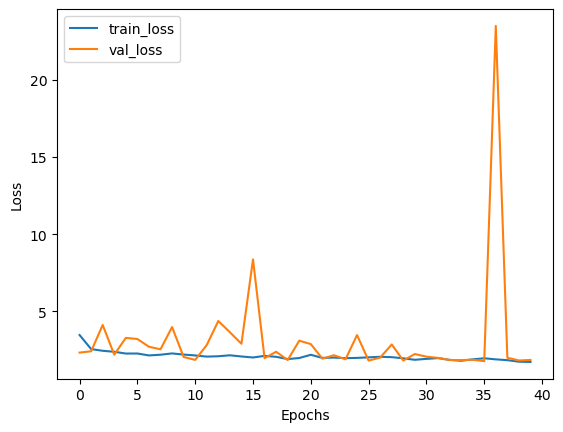

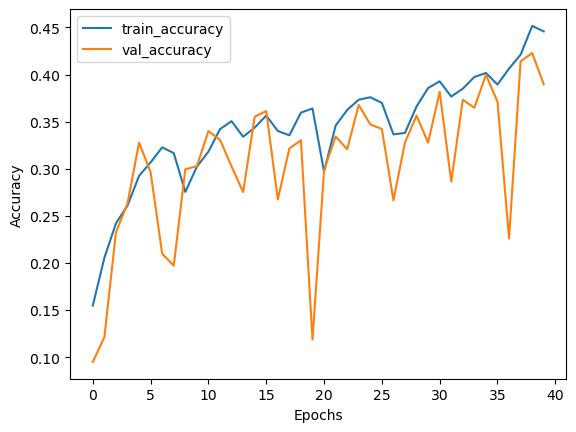




Iteration : 
0



40/40 [==============================] - 6s 61ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.8021551370620728, 'accuracy': 0.4004000127315521}
----------------------------------------------------------------------------------------------------
Starting to train with 21250 samples
Epoch 1/40
266/266 [==============================] - 111s 375ms/step - loss: 1.6359 - accuracy: 0.4360 - val_loss: 1.6065 - val_accuracy: 0.3986
Epoch 2/40
266/266 [==============================] - 93s 350ms/step - loss: 1.6532 - accuracy: 0.4351 - val_loss: 1.6053 - val_accuracy: 0.3788
Epoch 3/40
266/266 [==============================] - 93s 351ms/step - loss: 1.6714 - accuracy: 0.4091 - val_loss: 1.7859 - val_accuracy: 0.3548
Epoch 4/40
266/266 [==============================] - 93s 350ms/step - loss: 2.0580 - accuracy: 0.2995 - val_loss: 2.2724 - val_accuracy: 0.1993
Epoch 5/40
266/266 [==

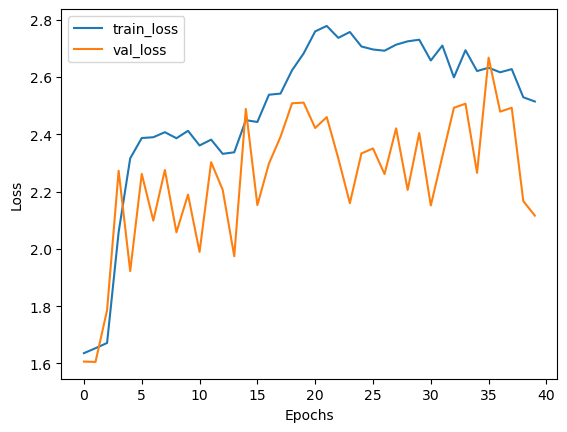

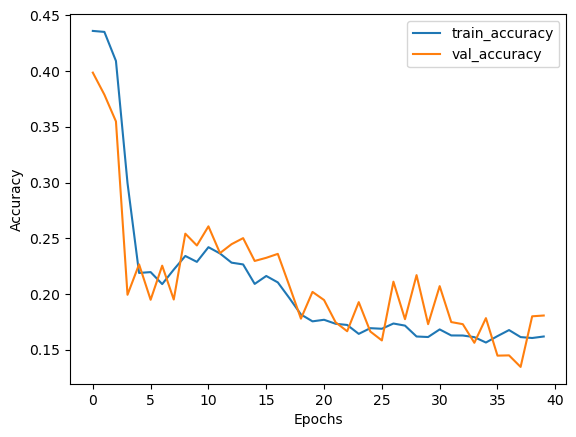




Iteration : 
1



40/40 [==============================] - 2s 55ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 2.2386271953582764, 'accuracy': 0.17900000512599945}
----------------------------------------------------------------------------------------------------
Starting to train with 22500 samples
Epoch 1/40
282/282 [==============================] - 99s 350ms/step - loss: 2.6033 - accuracy: 0.1386 - val_loss: 2.5284 - val_accuracy: 0.0996
Epoch 2/40
282/282 [==============================] - 97s 345ms/step - loss: 2.6243 - accuracy: 0.1326 - val_loss: 2.4798 - val_accuracy: 0.1418
Epoch 3/40
282/282 [==============================] - 103s 367ms/step - loss: 2.5523 - accuracy: 0.1361 - val_loss: 2.3226 - val_accuracy: 0.1313
Epoch 4/40
282/282 [==============================] - 103s 365ms/step - loss: 2.6061 - accuracy: 0.1288 - val_loss: 3.5138 - val_accuracy: 0.0896
Epoch 5/40
282/282 [

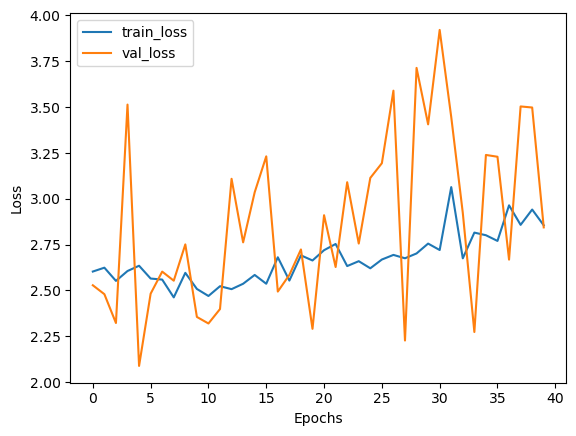

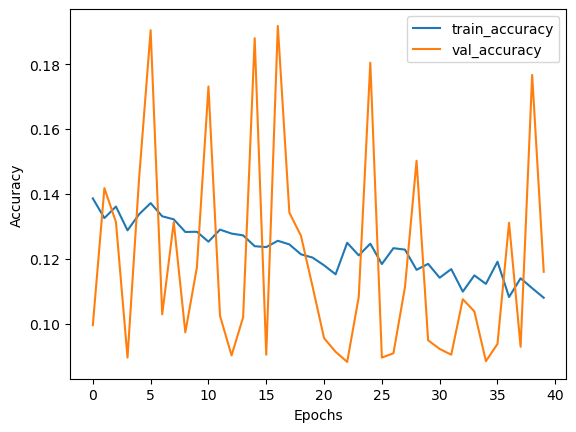




Iteration : 
2



40/40 [==============================] - 3s 69ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 3.2258479595184326, 'accuracy': 0.10320000350475311}
----------------------------------------------------------------------------------------------------
Starting to train with 23750 samples
Epoch 1/40
297/297 [==============================] - 113s 381ms/step - loss: 3.1000 - accuracy: 0.1093 - val_loss: 2.8982 - val_accuracy: 0.0857
Epoch 2/40
297/297 [==============================] - 114s 385ms/step - loss: 3.0546 - accuracy: 0.1059 - val_loss: 2.7123 - val_accuracy: 0.0899
Epoch 3/40
297/297 [==============================] - 116s 390ms/step - loss: 3.0602 - accuracy: 0.1064 - val_loss: 3.3803 - val_accuracy: 0.0806
Epoch 4/40
297/297 [==============================] - 119s 401ms/step - loss: 2.9603 - accuracy: 0.1063 - val_loss: 3.4010 - val_accuracy: 0.0964
Epoch 5/40
297/297

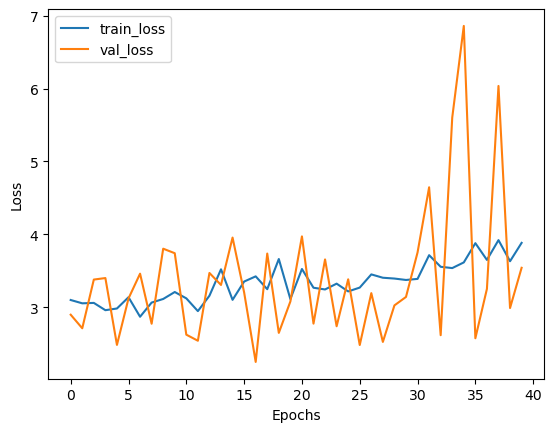

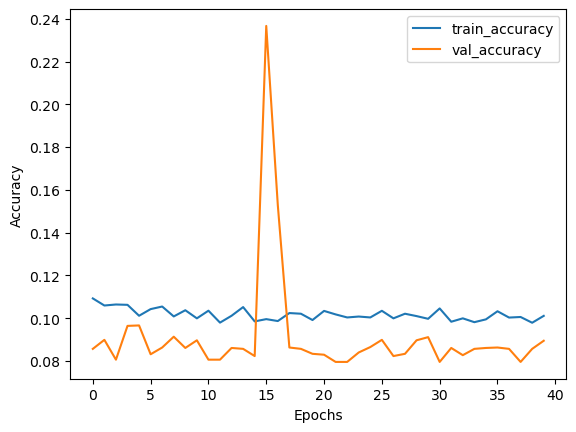




Iteration : 
3



40/40 [==============================] - 2s 55ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 4.286845684051514, 'accuracy': 0.0966000035405159}
----------------------------------------------------------------------------------------------------
Starting to train with 25000 samples
Epoch 1/40
313/313 [==============================] - 114s 365ms/step - loss: 3.7767 - accuracy: 0.1033 - val_loss: 4.3742 - val_accuracy: 0.0860
Epoch 2/40
313/313 [==============================] - 114s 365ms/step - loss: 4.1297 - accuracy: 0.1005 - val_loss: 3.1648 - val_accuracy: 0.0860
Epoch 3/40
313/313 [==============================] - 114s 363ms/step - loss: 3.7750 - accuracy: 0.1009 - val_loss: 3.8565 - val_accuracy: 0.0860
Epoch 4/40
313/313 [==============================] - 113s 360ms/step - loss: 3.9660 - accuracy: 0.1009 - val_loss: 4.5763 - val_accuracy: 0.0868
Epoch 5/40
313/313 [

In [ ]:
from sklearn.metrics import confusion_matrix
import random

def train_active_learning_models(
    X_train,
    Y_train,
    x_unlab,
    y_unlab,
    X_test,
    Y_test,
    num_iterations=5
):

    # Creating lists for storing metrics
    losses, val_losses, accuracies, val_accuracies = [], [], [], []

    model = create_model()
    # We will monitor the false positives and false negatives predicted by our model
    # These will decide the subsequent sampling ratio for every Active Learning loop
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
    model = train(model,X_train, Y_train)
    
    d = 100/num_iterations
    l = len(y_unlab)
    x = int(np.round( l/d ))
    
    for iteration in range(num_iterations-1):
        
        l = len(y_unlab)
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration)
        
        print("\n\n")
         
        #generate random number and substract from all numbers
        rnd = random.sample(range(1, l), x)
        all = list(range(1, l))
        main_list = list(set(all) - set(rnd))
        
        #add those index to from unlablled set to training set
        new_lab = x_unlab[rnd]
        arr = np.concatenate((X_train, new_lab))
        X_train = arr

        #predict on the set and add to training data
        new_y = np.round(model.predict(new_lab))
        arr = np.concatenate((Y_train, new_y))
        Y_train = arr
        
        
        #create the new unlabelled set
        x_unlab = x_unlab[main_list]

        #create the new unlabelled label set
        y_unlab = y_unlab[main_list]
        
        #test on data
        test(model, X_test, Y_test)
        
        #train on data
        model = train(model,X_train, Y_train)
        
    #Final round training set
    arr = np.concatenate((X_train, x_unlab))
    X_train = arr

    #Final round training label set
    new_y = np.round(model.predict(x_unlab))
    arr = np.concatenate((Y_train, new_y))
    Y_train = arr
    
    #train final
    model = train(model,X_train, Y_train)
    
    #test for final time
    test(model, X_test, Y_test)
        
    #return model
    return model

active_learning_model = train_active_learning_models(X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=5)